# K-Means and K-Medoids Clustering Project

For this project, we will use **K-Means** and **K-Medoids Clustering** to cluster universities into two groups: <em>private</em> and <em>public</em>.

It is important to note that we have the labels for this dataset, but we <ins>will NOT use</ins> them for these clustering algorithms, as they are unsupervised learning algorithms. 

The K-Means algorithm under normal circumstances is used when there are no labels. In this exercise, we will use the labels trying to get an idea of how well the algorithm performed. It is not usual to do this for K-Means, so the classification report and confusion matrix at the end of this project don't really make sense in a real-world scenario.

## The data
We will use a data frame with 777 observations on the following 18 variables:

* **Private** - A factor with levels No and Yes indicating private or public university
* **Apps** - Number of applications received
* **Accept** - Number of applications accepted
* **Enroll** - Number of new students enrolled
* **Top10perc** - % of new students from top 10% of H.S. class
* **Top25perc** - % of new students from top 25% of H.S. class
* **F.Undergrad** - Number of full-time undergraduates
* **P.Undergrad** - Number of part-time undergraduates
* **Outstate** - Out-of-state tuition
* **Room.Board** - Room and board costs
* **Books** - Estimated book costs
* **Personal** - Estimated personal spending
* **PhD** - % of faculty with Ph.D.’s
* **Terminal** - % of faculty with terminal degree
* **S.F.Ratio** - Student/faculty ratio
* **perc.alumni** - % of alumni who donate
* **Expend** - Instructional expenditure per student
* **Grad.Rate** - Graduation rate

## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the data

Read in the <em>College_Data</em> file and set the first column as the index:

In [7]:
data = pd.read_csv('College_Data.csv')
data['index'] = data.index

In [8]:
data

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,index
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,2
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,3
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,772
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,773
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,774
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,775


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
 19  index   

In [10]:
data.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,index
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000,777.000000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332,388.000000
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771,224.444871
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000,0.000000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000,194.000000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000,388.000000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000,582.000000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000,776.000000


## EDA

Create a scatterplot of <em>Grad.Rate</em> vs. <em>Room.Board</em> where the points are grouped by the <em>Private</em> column:

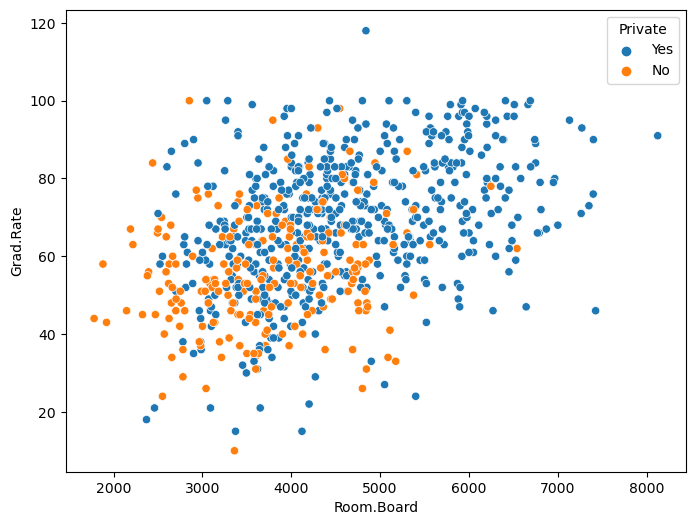

In [14]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x='Room.Board', y='Grad.Rate', hue='Private', data=data) 
plt.show()

Create a scatterplot of <em>F.Undergrad</em> vs. <em>Outstate</em> where the points are grouped by the <em>Private</em> column:

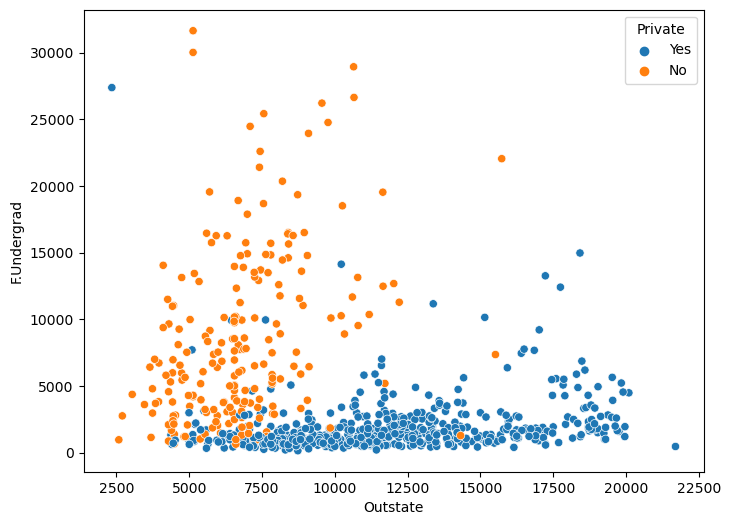

In [13]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x='Outstate', y='F.Undergrad', hue='Private', data=data) 
plt.show()

Create a stacked histogram showing <em>Out of State Tuition</em> based on the <em>Private</em> column.  
Try doing this using [sns.FacetGrid](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.FacetGrid.html). <ins>Alternative</ins>: you can do it by using two instances of <code>pandas.plot(kind='hist')</code>:

c:\Users\joaop\miniconda3\envs\mypython3version\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


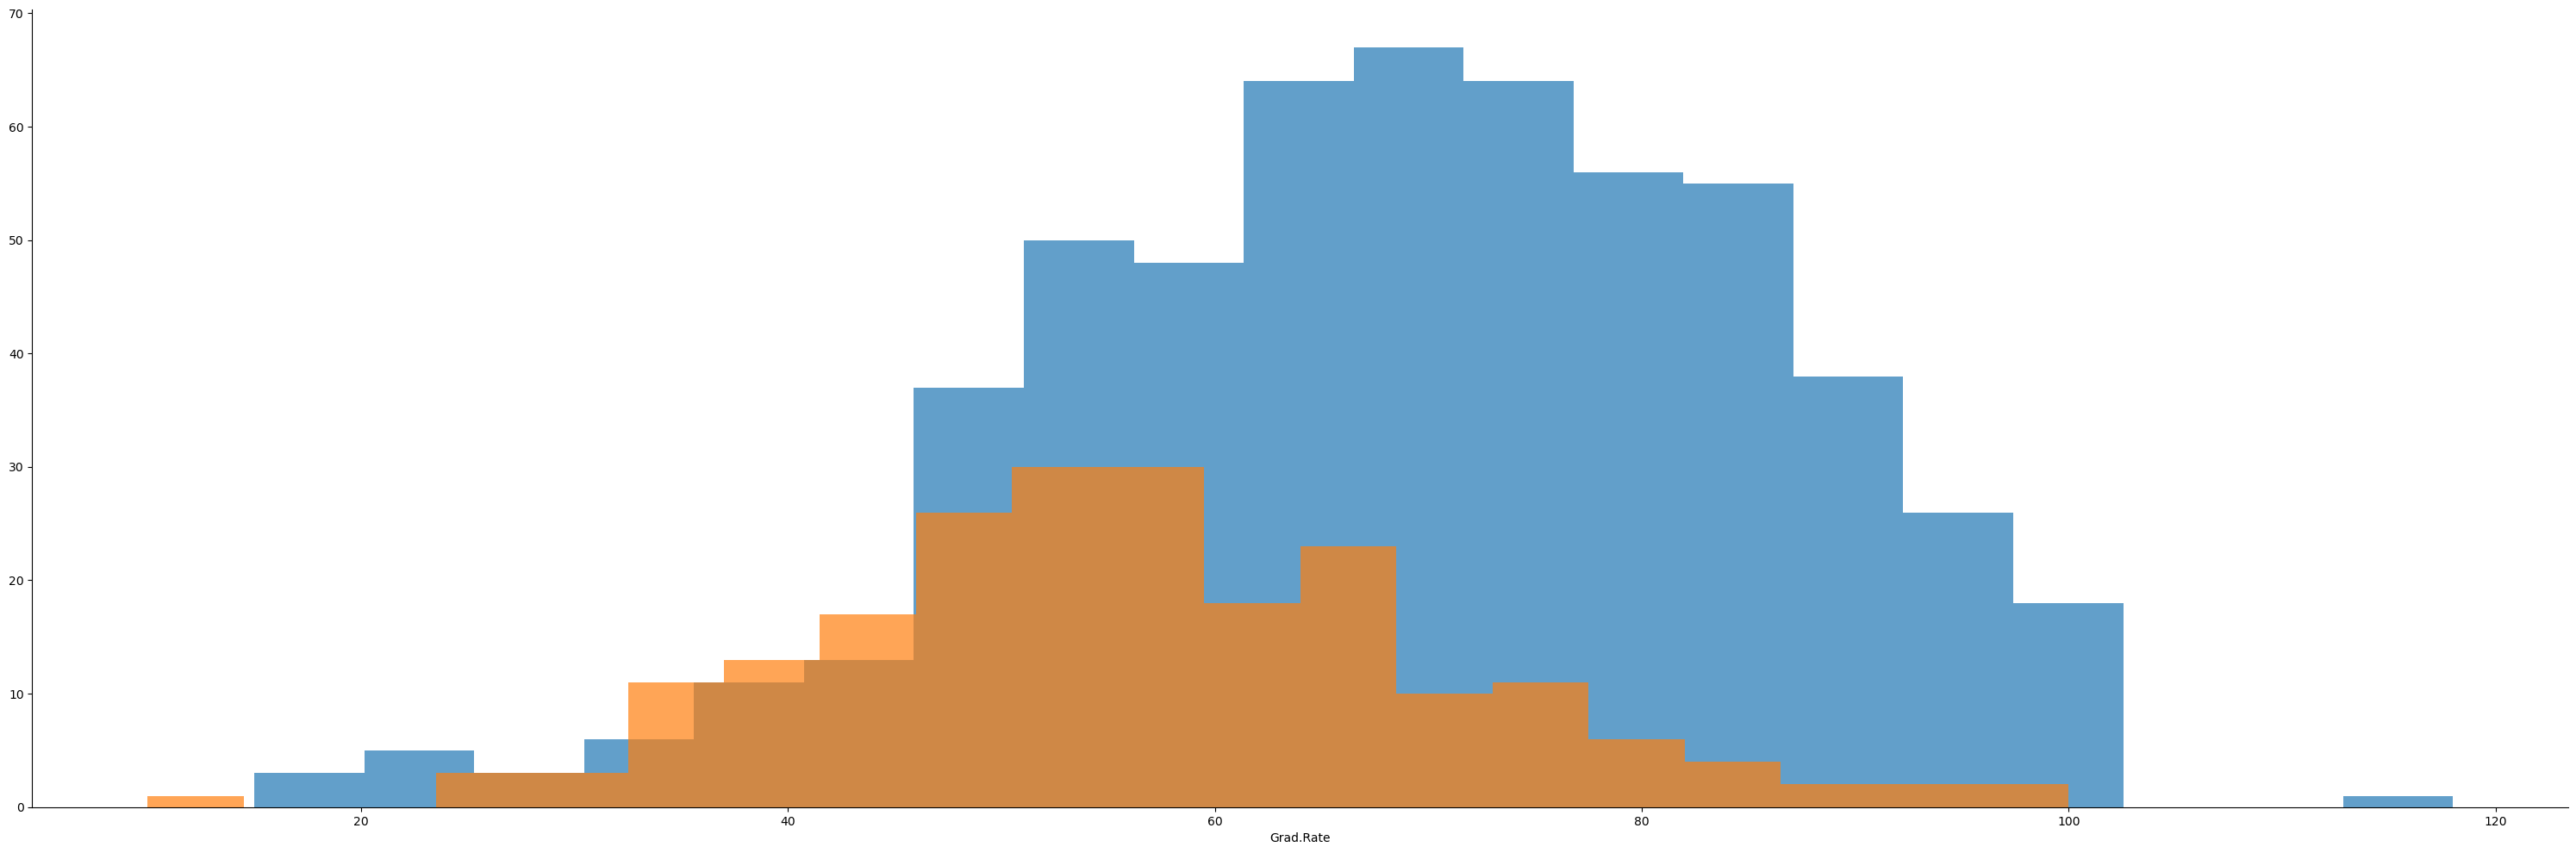

In [28]:
g = sns.FacetGrid(data,hue='Private',height=10,aspect=3)
g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)
plt.show()

Create a similar histogram for the <em>Grad.Rate</em> column:

C:\Users\Admin\.conda\envs\myenv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


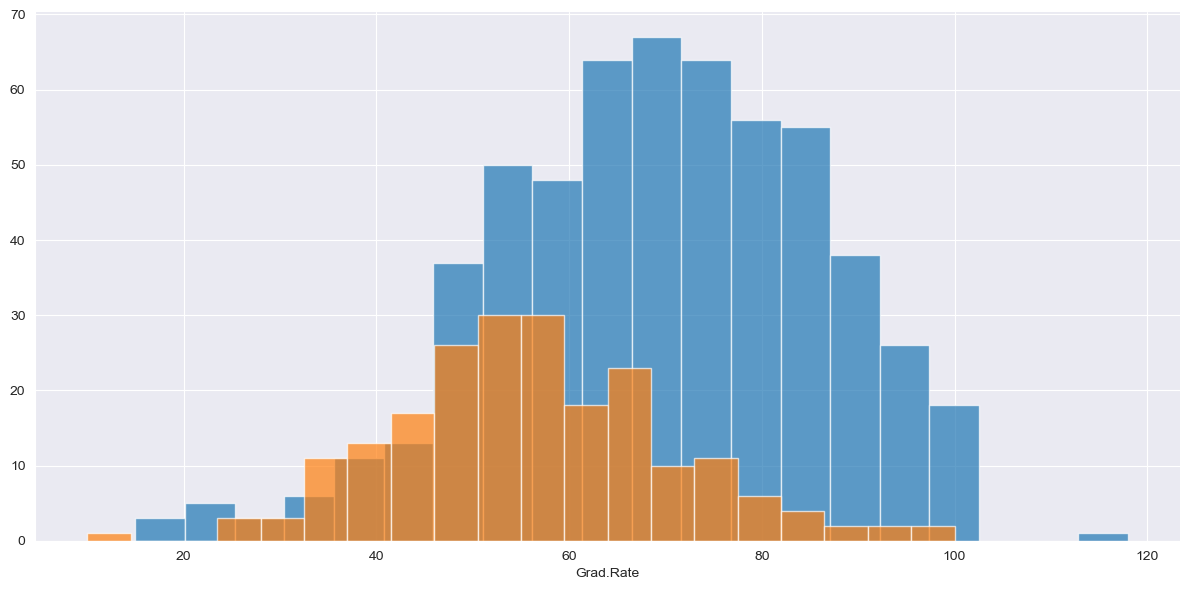

Notice that there seems to be a private school with a graduation rate of higher than 100%. **What is the name of that school?**

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


Set that school's graduation rate to 100. You may get a warning (not an error) when doing this operation, so use dataframe operations or just re-do the histogram visualization to make sure it actually went through:

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Amherst College,Yes,4302,992,418,83,96,1593,5,19760,5300,660,1598,93,98,8.4,63,21424,100
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,100
College of Mount St. Joseph,Yes,798,620,238,14,41,1165,1232,9800,4430,400,1150,46,46,11.1,35,6889,100
Grove City College,Yes,2491,1110,573,57,88,2213,35,5224,3048,525,350,65,65,18.4,18,4957,100
Harvard University,Yes,13865,2165,1606,90,100,6862,320,18485,6410,500,1920,97,97,9.9,52,37219,100
Harvey Mudd College,Yes,1377,572,178,95,100,654,5,17230,6690,700,900,100,100,8.2,46,21569,100
Lindenwood College,Yes,810,484,356,6,33,2155,191,9200,4800,1000,4200,65,85,24.1,9,3480,100
Missouri Southern State College,No,1576,1326,913,13,50,3689,2200,3840,2852,200,400,52,54,20.3,9,4172,100
Santa Clara University,Yes,4019,2779,888,40,73,3891,128,13584,5928,630,1278,88,92,13.9,19,10872,100
Siena College,Yes,2961,1932,628,24,68,2669,616,10800,5100,575,1090,71,82,14.1,42,8189,100


Re-create the histogram for the <em>Grad.Rate</em> column:

C:\Users\Admin\.conda\envs\myenv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


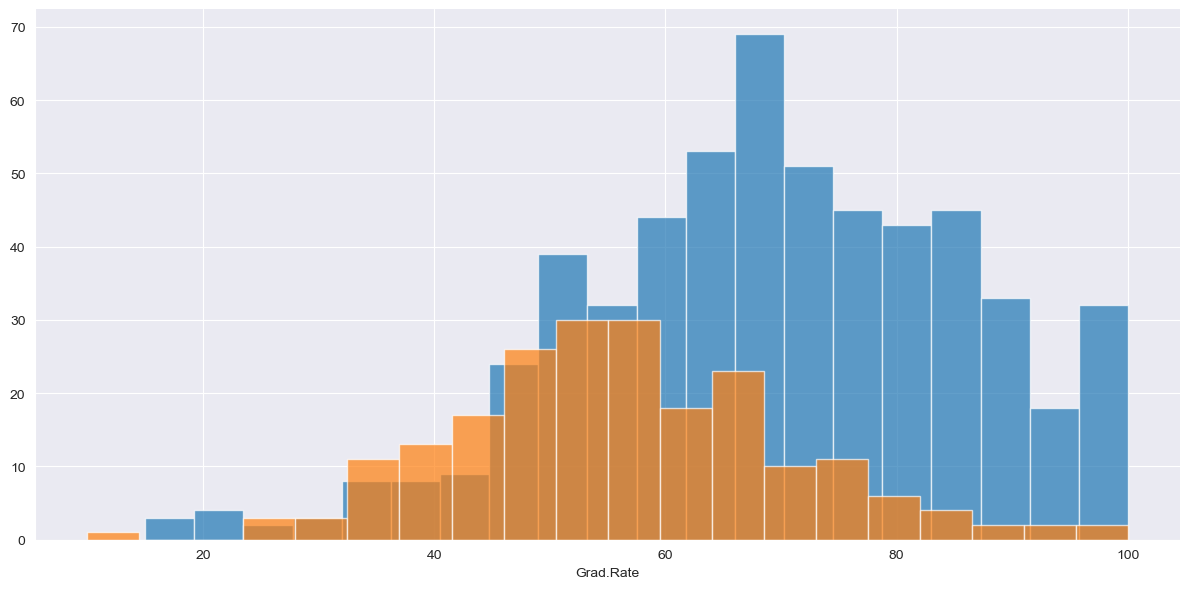

## K-Means Cluster Creation

In [53]:
from sklearn.cluster import KMeans

Create an instance of a K-Means model with 2 clusters:

Fit the model to all the data except for the <em>Private</em> label:

KMeans(n_clusters=2, n_init=10, random_state=2022)

**What are the cluster center vectors?**

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Evaluation

There is no perfect way to evaluate the clustering if you don't have the labels. However, we do have the labels, but as this is an exercise, we will use them to evaluate our clusters.  
<ins>Keep in mind</ins>: you usually won't have this privilege in the real world.

Create a new column for the data frame called <em>Cluster</em>, in which "1" stands for <em>private</em> school and "0" for <em>public</em> school:

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,0
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0


Abilene Christian University      0
Adelphi University                0
Adrian College                    0
Agnes Scott College               0
Alaska Pacific University         0
                                 ..
Worcester State College           1
Xavier University                 0
Xavier University of Louisiana    0
Yale University                   0
York College of Pennsylvania      0
Name: Cluster, Length: 777, dtype: int64

Abilene Christian University      Yes
Adelphi University                Yes
Adrian College                    Yes
Agnes Scott College               Yes
Alaska Pacific University         Yes
                                 ... 
Worcester State College            No
Xavier University                 Yes
Xavier University of Louisiana    Yes
Yale University                   Yes
York College of Pennsylvania      Yes
Name: Private, Length: 777, dtype: object

count    777.000000
mean       0.272844
std        0.445708
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Cluster, dtype: float64

count     777
unique      2
top       Yes
freq      565
Name: Private, dtype: object

Create a histogram of the clusters grouped by <em>Private</em> column:

C:\Users\Admin\.conda\envs\myenv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


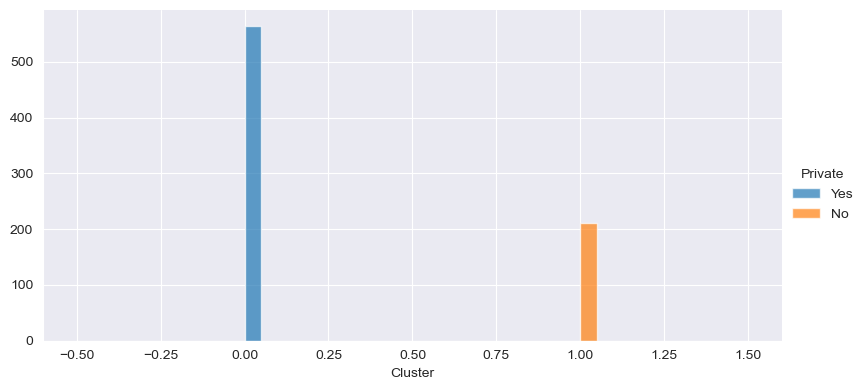

Create a lmplot of the clusters vs. <em>F.Undergrad</em> grouped by <em>Private</em> column:

C:\Users\Admin\.conda\envs\myenv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


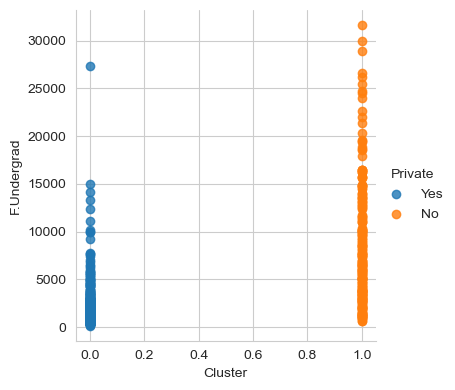

Create a confusion matrix and classification report to see how well the K-Means clustering worked without being given any labels:

In [66]:
from sklearn.metrics import confusion_matrix, classification_report

[[531  34]
 [138  74]]


              precision    recall  f1-score   support

           0       0.79      0.94      0.86       565
           1       0.69      0.35      0.46       212

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



It is not so bad considering that the algorithm is only using the features to cluster the universities into two distinct groups! Hopefully, you can start to see how useful K-Means is for clustering unlabelled data!

## K-Medoids Cluster Creation

In [69]:
from sklearn_extra.cluster import KMedoids

Create an instance of a K-Medoids model with 2 clusters:

Fit the model to all the data except for the <em>Private</em> label:

KMedoids(n_clusters=2, random_state=2022)

**What are the cluster center vectors?**

array([[1.6600e+03, 1.2320e+03, 7.2100e+02, 2.3000e+01, 5.2000e+01,
        2.8850e+03, 5.3700e+02, 7.4400e+03, 3.3000e+03, 4.5000e+02,
        2.2000e+03, 7.0000e+01, 7.8000e+01, 1.8100e+01, 1.2000e+01,
        7.0410e+03, 6.0000e+01, 0.0000e+00],
       [1.1830e+03, 1.0160e+03, 4.1100e+02, 4.2000e+01, 8.2000e+01,
        1.9220e+03, 7.0400e+02, 1.2669e+04, 4.8750e+03, 6.0000e+02,
        1.2500e+03, 8.3000e+01, 8.5000e+01, 1.6800e+01, 2.0000e+01,
        1.0368e+04, 6.6000e+01, 0.0000e+00]])

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,

### Evaluation

Create a new column for the data frame called <em>Cluster</em>,in which "1" stands for <em>private</em> school and "0" for <em>public</em> school:

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


Create a confusion matrix and classification report to see how well the K-Medoids clustering worked without being given any labels:

In [76]:
from sklearn.metrics import confusion_matrix, classification_report

[[202  10]
 [195 370]]


              precision    recall  f1-score   support

           0       0.51      0.95      0.66       212
           1       0.97      0.65      0.78       565

    accuracy                           0.74       777
   macro avg       0.74      0.80      0.72       777
weighted avg       0.85      0.74      0.75       777



**Which model performed better for this data set?**  
Outline a critical analysis of these two models.